In [120]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot

In [113]:
df = pd.read_csv("data/prepped/all_recipes.csv")

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (55,56,57,58,59,60) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [114]:
df = df.dropna(subset=['rating_value'])

In [115]:
df.shape

(1978, 67)

In [116]:
df.describe()

,Unnamed: 0,ibu,og,fg,brewed_count,boil_time,boil_gravity,efficiency,mash_thickness,pitch_rate,...,other_type_fining,other_type_flavor,other_type_herb,yeast_amount,water_ca+2,water_mg+2,water_na+,water_cl-,water_so4-2,water_hco3-
count,1978.000000,1978.000000,1978.000000,1978.000000,1978.00000,1978.000000,1946.000000,1978.000000,1159.000000,1122.000000,...,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000
mean,29469.898888,47.412154,1.313058,1.056594,2.10364,65.622851,1.265152,67.388281,2.116312,0.732531,...,0.254803,0.128413,0.013650,1.327098,33.104702,4.613498,11.321132,29.300051,42.315728,43.315217
std,27412.570243,40.572785,1.800480,0.339105,10.72637,15.407771,1.592605,13.866621,1.440166,0.390878,...,0.435861,0.334633,0.116063,5.774417,46.884126,13.360811,20.450434,43.143947,86.961250,79.167088
min,0.000000,0.000000,1.007000,0.969000,0.00000,0.000000,1.006000,0.000000,0.600000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4520.750000,25.232500,1.051000,1.011000,0.00000,60.000000,1.040000,65.000000,1.400000,0.350000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19489.500000,37.880000,1.058000,1.013000,1.00000,60.000000,1.047000,70.000000,1.500000,0.750000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,52652.250000,59.557500,1.068000,1.016000,2.00000,60.000000,1.058000,75.000000,3.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,75.000000,5.000000,20.000000,60.000000,80.000000,89.250000
max,99965.000000,767.470000,19.815500,6.644610,373.00000,240.000000,33.900000,100.000000,20.000000,2.000000,...,1.000000,1.000000,1.000000,200.000000,294.000000,120.000000,125.000000,219.000000,800.000000,387.000000


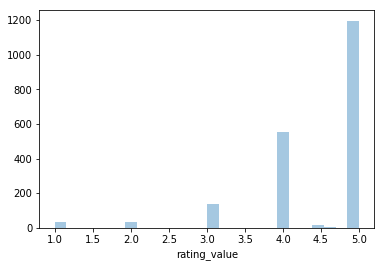

In [117]:
sns.distplot(df['rating_value'], kde=False)

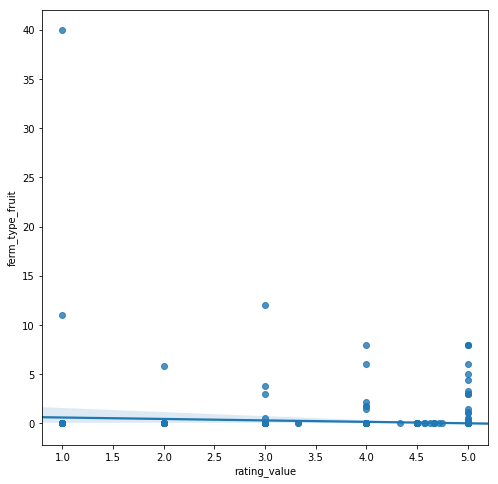

In [136]:
a4_dims = (8, 8)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.regplot(y=df['ferm_type_fruit'], x=df['rating_value'])

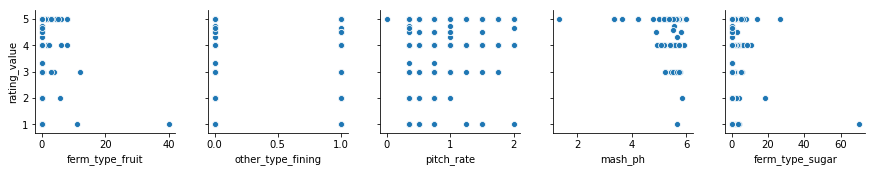

In [168]:
pp = sns.pairplot(data=df,
                  y_vars=['rating_value'],
                  x_vars=top[1:6])

In [23]:
df.columns[df.isna().any()].tolist()

['author',
 'boil_gravity',
 'mash_thickness',
 'pitch_rate',
 'priming_method',
 'priming_amount',
 'mash_ph',
 'yeast_name',
 'yeast_type',
 'yeast_form',
 'yeast_laboratory',
 'yeast_attenuation',
 'yeast_flocculation']

In [24]:
df.isna().sum()

Unnamed: 0                       0
title                            0
title_url                        0
author                         189
style_title                      0
style_url                        0
batch_size                       0
abv                              0
ibu                              0
og                               0
fg                               0
color_title                      0
color_hex                        0
method                           0
brewed_count                     0
boil_size                        0
boil_time                        0
boil_gravity                    32
efficiency                       0
mash_thickness                 819
sugar_scale                      0
pitch_rate                     856
primary_temp                     0
priming_method                1670
priming_amount                1760
creation_date                    0
notes                            0
title_url.1                      0
mash_ph             

In [27]:
df = df.drop(columns=['mash_thickness', 'pitch_rate', 'mash_ph', 'priming_amount', 'priming_method'])

In [28]:
df.isna().sum()

Unnamed: 0                      0
title                           0
title_url                       0
author                        189
style_title                     0
style_url                       0
batch_size                      0
abv                             0
ibu                             0
og                              0
fg                              0
color_title                     0
color_hex                       0
method                          0
brewed_count                    0
boil_size                       0
boil_time                       0
boil_gravity                   32
efficiency                      0
sugar_scale                     0
primary_temp                    0
creation_date                   0
notes                           0
title_url.1                     0
rating_value                    0
rating_count                    0
view_count                      0
ferm_total_weight               0
ferm_type_base_malt             0
ferm_type_crys

In [43]:
df[df['yeast_name'].isnull()]['rating_value']

610      5.0
8120     5.0
18350    5.0
40882    5.0
59019    3.0
97222    4.0
97407    5.0
98243    5.0
98543    4.0
99196    4.0
99255    5.0
99965    5.0
Name: rating_value, dtype: float64

In [50]:
corr = df.corr().abs()

In [53]:
stack = corr.unstack()

In [61]:
so = stack.sort_values(kind="quicksort", ascending=False)

In [143]:
l = df[df.columns[1:]].corr()['rating_value'][:-1].abs()

In [158]:
s = l.sort_values(kind="quicksort", ascending=False)
s.drop('rating_value')
top = list(s.index)

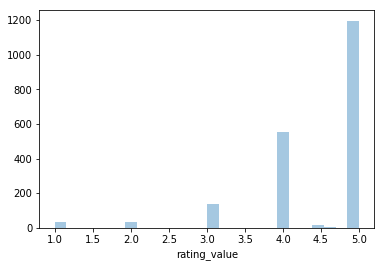

In [42]:
sns.distplot(df['rating_value'], kde=False)

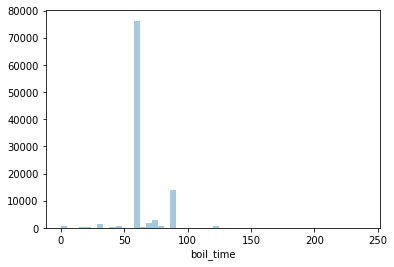

In [7]:
sns.distplot(df['boil_time'], kde=False)

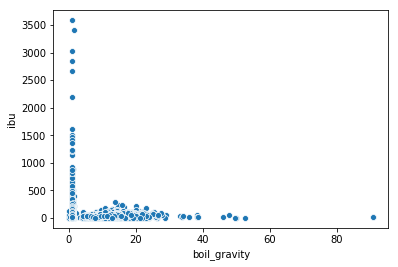

In [8]:
sns.scatterplot(x=df['boil_gravity'], y=df['ibu'])

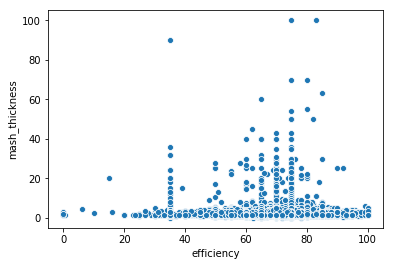

In [10]:
sns.scatterplot(x=df['efficiency'], y=df['mash_thickness'])